# Data Exploration
<br>

1. Continuous and Continuous
1. Categorical and Continuous
1. Categorical and Categorical
<br>
<br>
Traditional Haiku Structure

- There are only three lines, totaling 17 syllables.
- The first line is 5 syllables.
- The second line is 7 syllables.
- The third line is 5 syllables like the first.
- Punctuation and capitalization are up to the poet, and need not follow the rigid rules used in structuring sentences.

<div class="alert alert-box alert-info">
    
Data is record
    
Values to store the truth

Does the one know it?

</div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [5]:
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))

In [6]:
from wrangle import wrangle_grades

In [7]:
df = wrangle_grades()

In [8]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_validate, test_size=.1, random_state=123)

In [11]:
train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

##  Continuous and Continuous

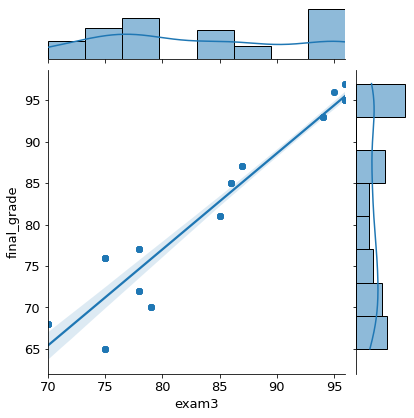

In [12]:
sns.jointplot(x='exam3',
              y='final_grade',
              data=train,
              kind='reg'
             );

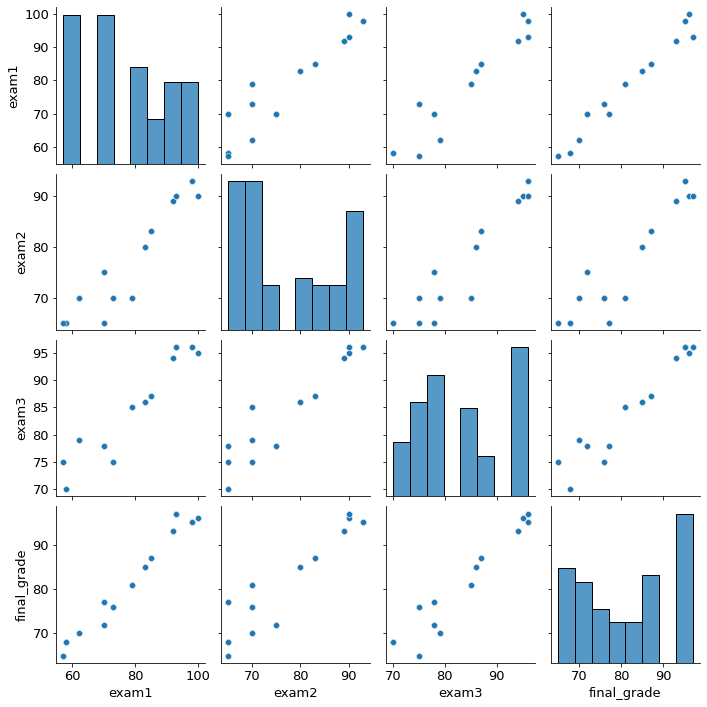

In [13]:
sns.pairplot(data=train);

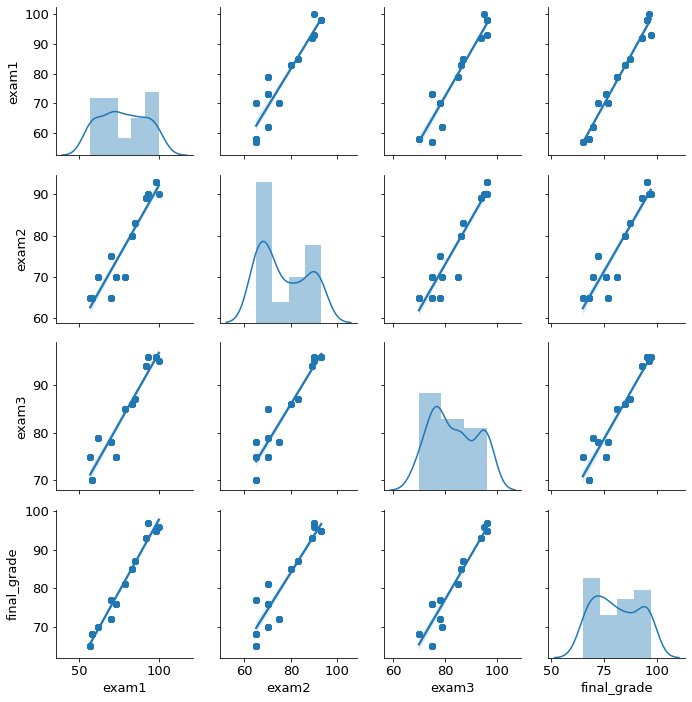

In [14]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot);

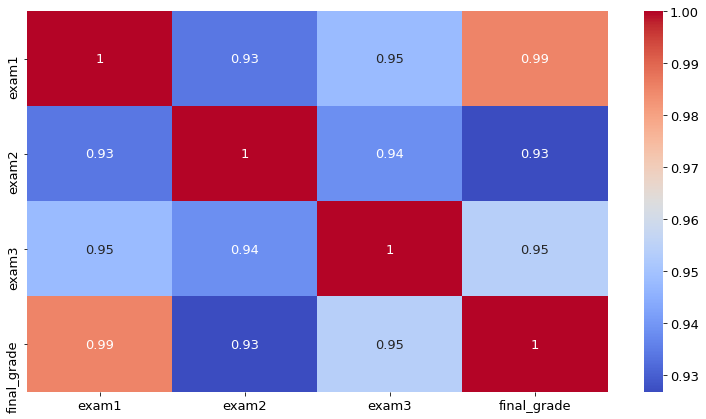

In [15]:
a = np.zeros_like(train.corr())

sns.heatmap(train.corr(),
           cmap='coolwarm',
           annot=True);

## Continous and Categorical

In [16]:
train['exam1_letter_grade'] = pd.cut(train.exam1,
                                     bins=[0, 70, 80, 90, 105],
                                     labels=['D', 'C', 'B', 'A']
                                    )

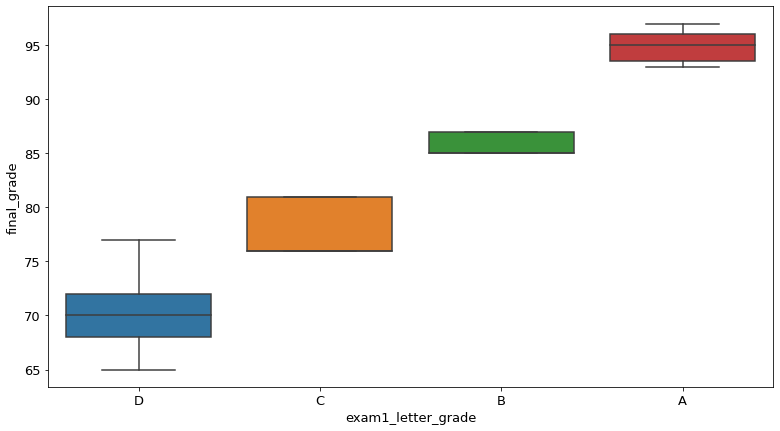

In [17]:
sns.boxplot(data=train,
            y='final_grade',
            x='exam1_letter_grade'
           );

__Takeaways__:
- Students with D's have more variation in exam 1 grade than other letter grades.
- Students with B's have the least variation in exam 1

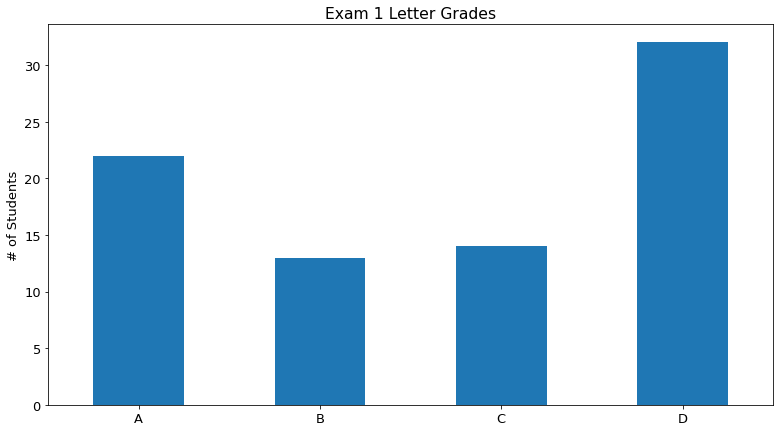

In [18]:
train.exam1_letter_grade.value_counts().sort_index(ascending=False).plot.bar()                                                                      
plt.xticks(rotation=0)
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grades');

In [19]:
np.random.seed(13)
train['classroom'] = np.random.choice(['One','Two'], train.shape[0])

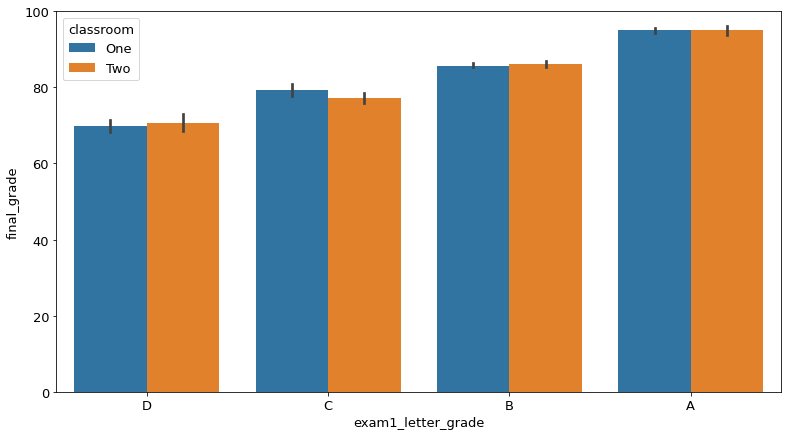

In [20]:
sns.barplot(data=train,
            y='final_grade',
            x='exam1_letter_grade',
            hue='classroom')

plt.ylim(0, 100);

Takeaways:

The distribution of grades in classrooom one and classroom two are about the same.
Classroom doesn't impact final grade?

- $H_0$ There is no difference in final grade between classroom one and classroom two
- $H_1$ There is no difference in final grade between classroom one and classroom two

In [21]:
from scipy import stats

t, p = stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var=False
)

In [22]:
print(f"p-value {p:.2%}")

p-value 38.88%


We fail to reject:
$H_0$ There is no difference in final grade between classroom one and classroom two

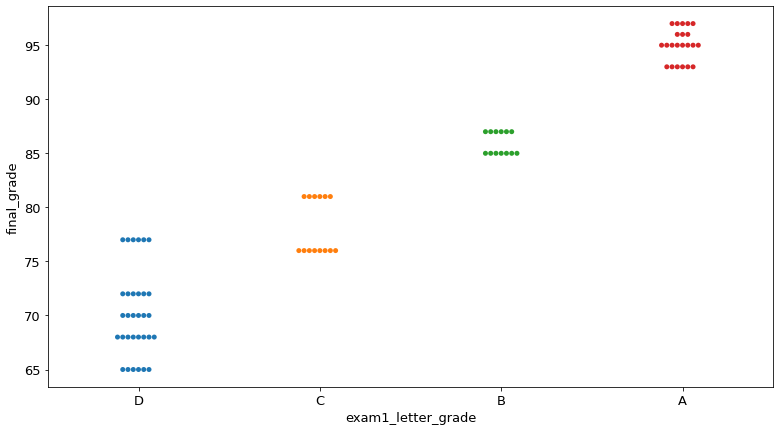

In [23]:
sns.swarmplot(data=train,
              y='final_grade',
              x='exam1_letter_grade'
             );

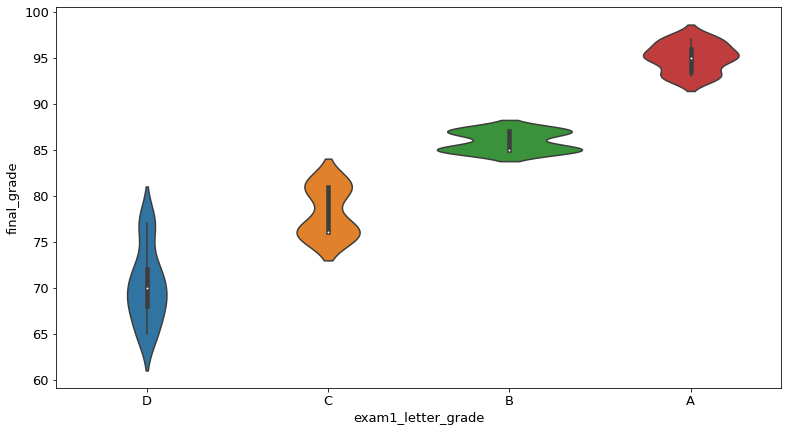

In [24]:
sns.violinplot(data=train,
               y='final_grade',
               x='exam1_letter_grade'
             );

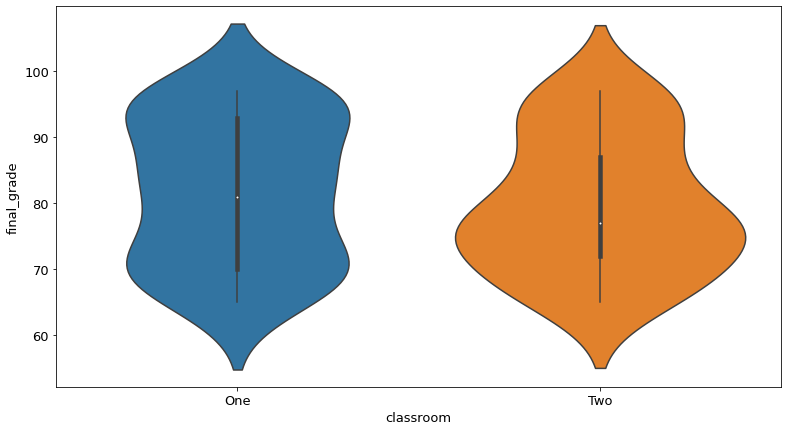

In [25]:
sns.violinplot(data=train,
               y='final_grade',
               x='classroom');

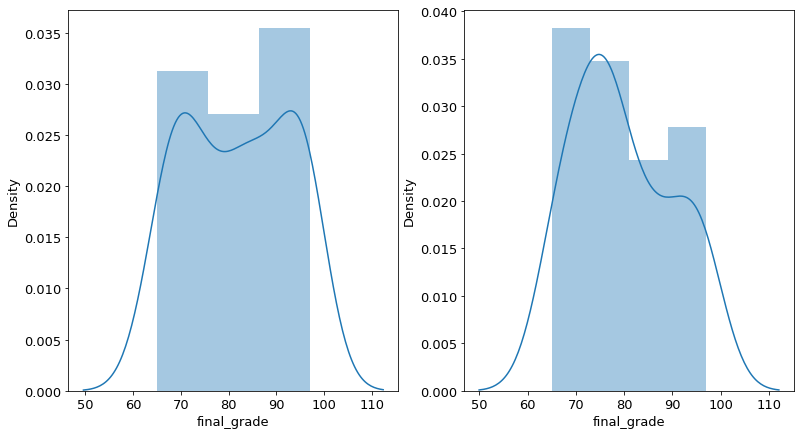

In [26]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade);

## Categorical and Categorical

Crosstabs help visualize the relationships between categorical variables.

In [27]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


In [28]:
pd.crosstab(train.exam1_letter_grade, train.classroom)

classroom,One,Two
exam1_letter_grade,,
D,17,15
C,6,8
B,8,5
A,14,8


In [29]:
pd.crosstab(train.exam1_letter_grade,
            train.classroom,
            normalize=True).sort_index(ascending=False).round(3)

classroom,One,Two
exam1_letter_grade,,
A,0.173,0.099
B,0.099,0.062
C,0.074,0.099
D,0.210,0.185


In [30]:
ctab = pd.crosstab(train.exam1_letter_grade,
                   train.classroom,
                   normalize=True
                  ).sort_index(ascending=False)

ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
A,17.3%,9.9%
B,9.9%,6.2%
C,7.4%,9.9%
D,21.0%,18.5%


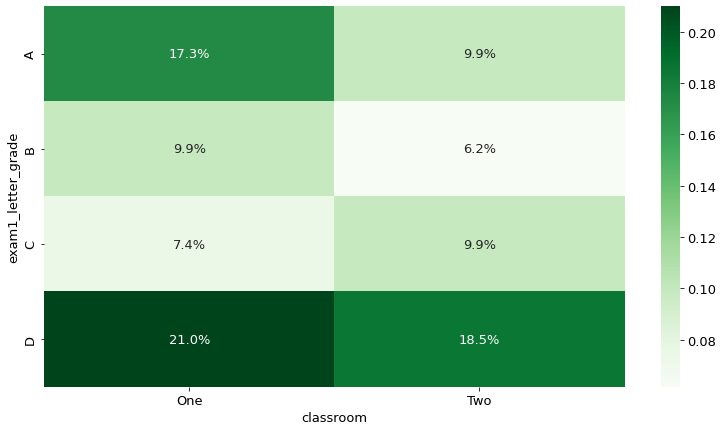

In [31]:
sns.heatmap(ctab,
            cmap='Greens',
            annot=True,
            fmt='.1%'
           );

In [32]:
# Of the students in class One, x% earned an A

pd.crosstab(train.exam1_letter_grade,
            train.classroom,
            normalize='columns'
           ).sort_index(ascending=False).T

exam1_letter_grade,A,B,C,D
classroom,,,,
One,0.311111,0.177778,0.133333,0.377778
Two,0.222222,0.138889,0.222222,0.416667


In [33]:
# Of the students that earned an A x% are in class One, 1-x% are in class Two

pd.crosstab(train.classroom,
            train.exam1_letter_grade,
            normalize='columns'
           ).sort_index('columns', ascending=False)

exam1_letter_grade,A,B,C,D
classroom,,,,
One,0.636364,0.615385,0.428571,0.53125
Two,0.363636,0.384615,0.571429,0.46875


Chi Squared Test

$H_0$: Exam 1 letter grade and classroom are independent of each other.

$H_a$: Exam 1 letter grade and classroom are dependent.

In [34]:
from scipy import stats

In [35]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom)

chi2, p, degrees_of_freedom, expected_proportions = stats.chi2_contingency(ctab)

In [36]:
p

0.6234302397249452

We fail to reject:

$H_0$: Exam 1 letter grade and classroom are independent of each other.

#  Mall Customers Data
### Visualizations

In [43]:
from prepare import prep_mall_data
from explore import plot_variable_pairs, plot_categorical_and_continuous_cars

In [44]:
df = pd.read_csv('mall_customers.csv')

In [45]:
df = prep_mall_data(df)

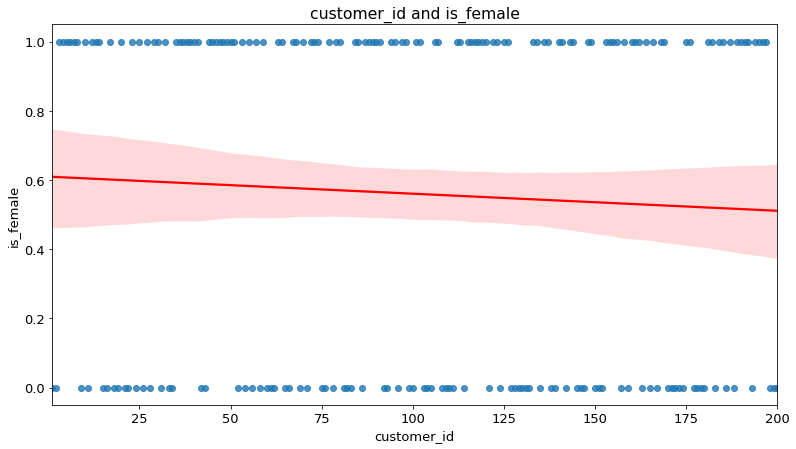

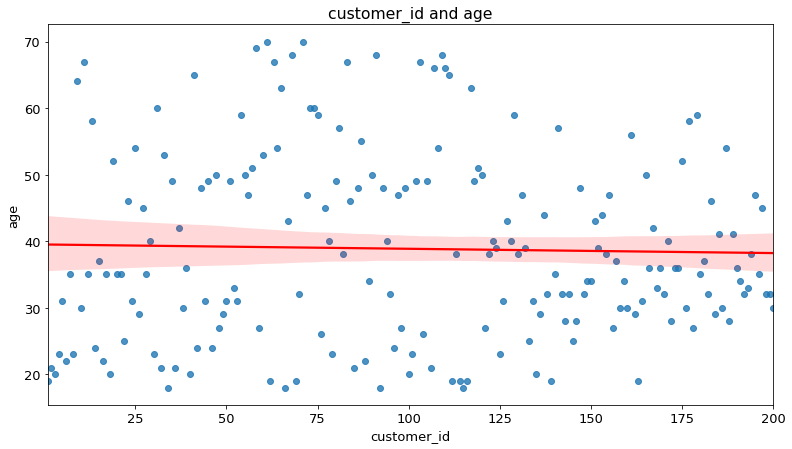

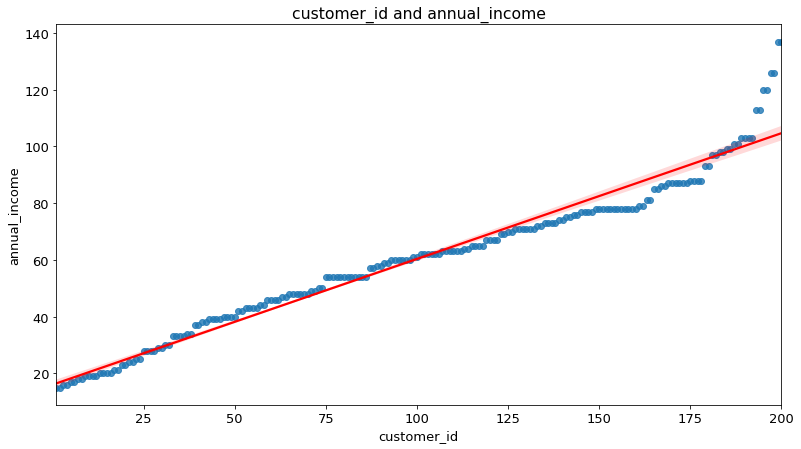

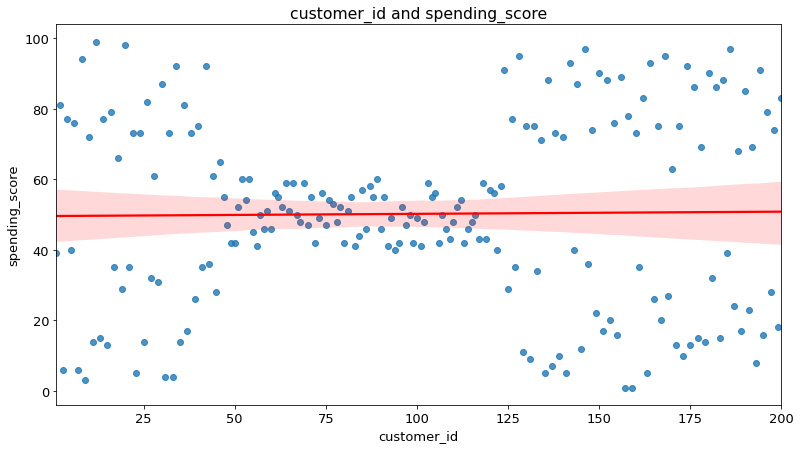

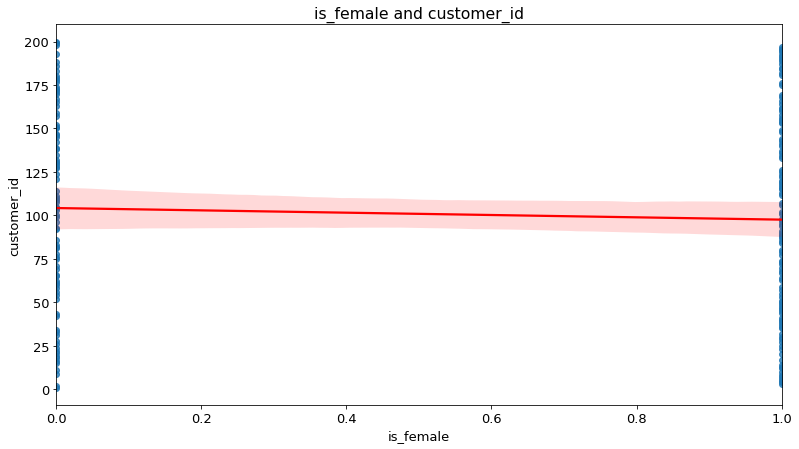

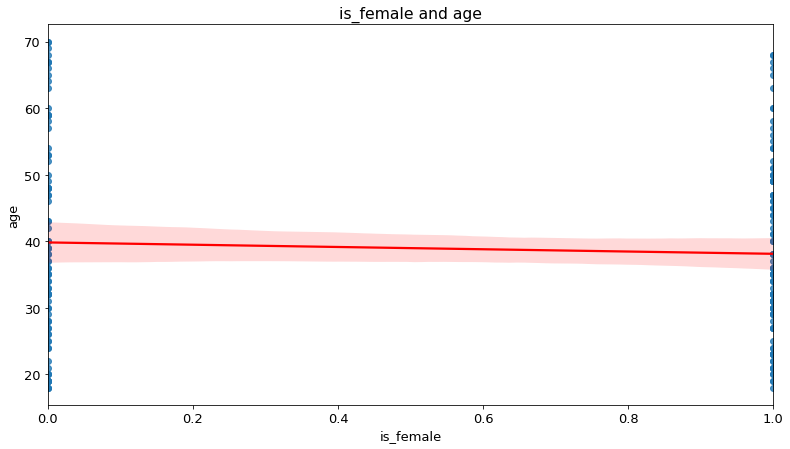

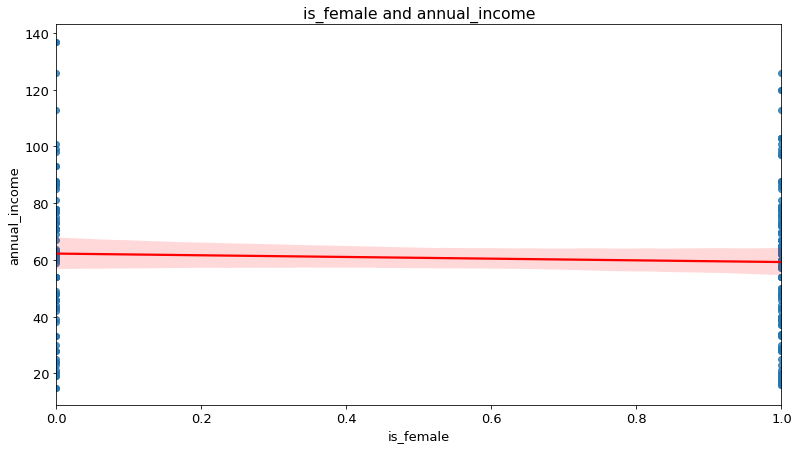

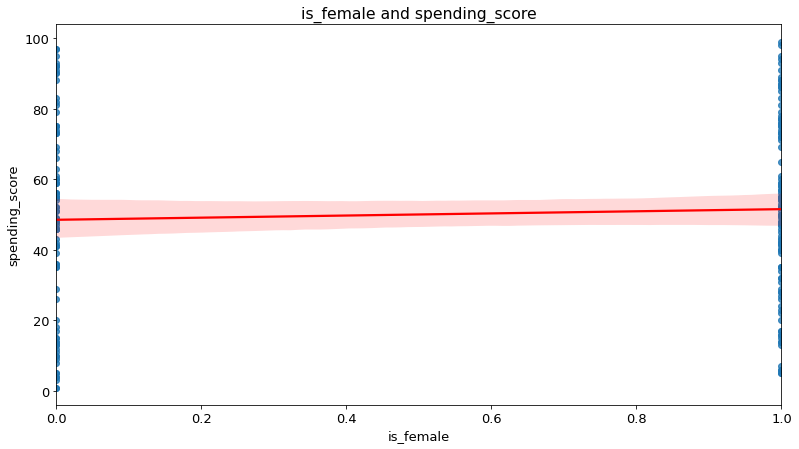

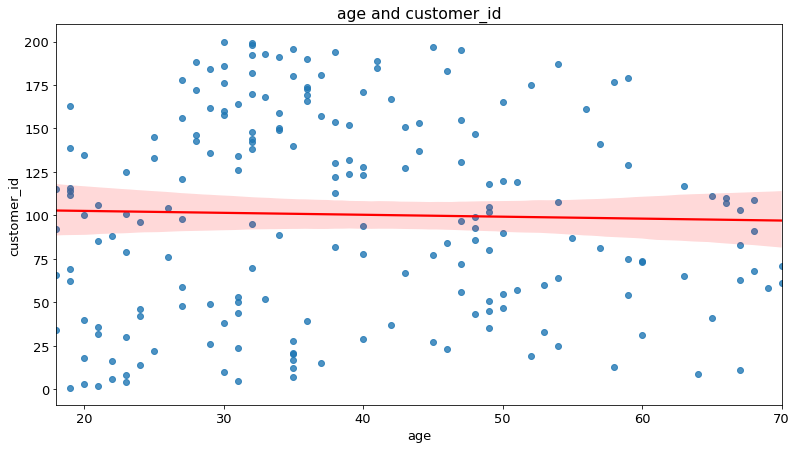

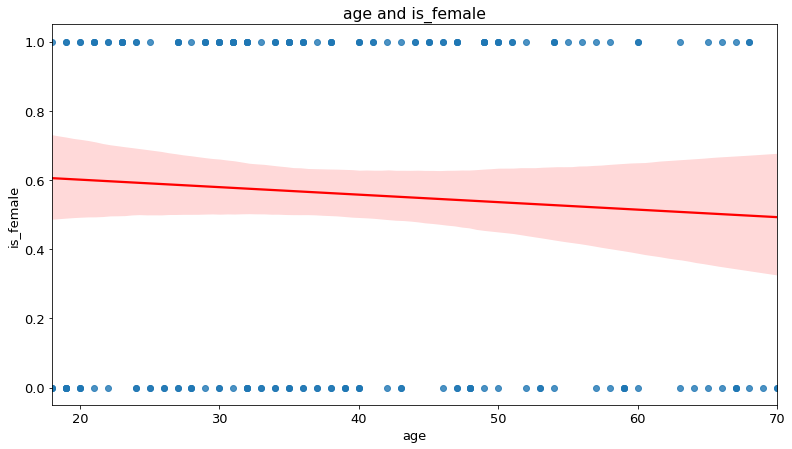

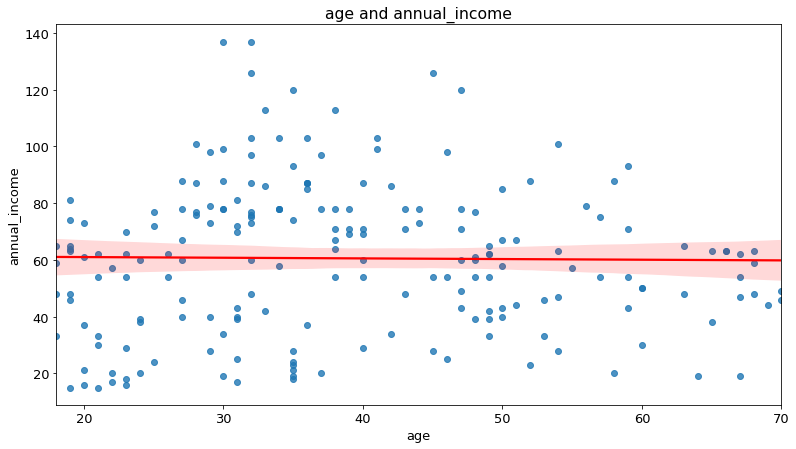

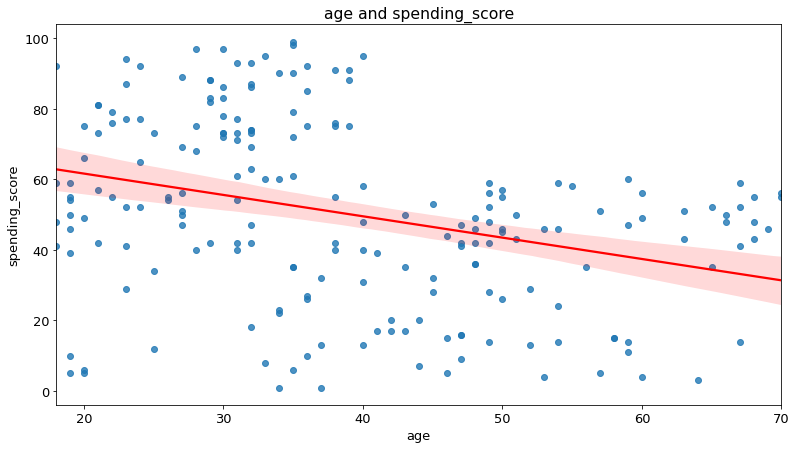

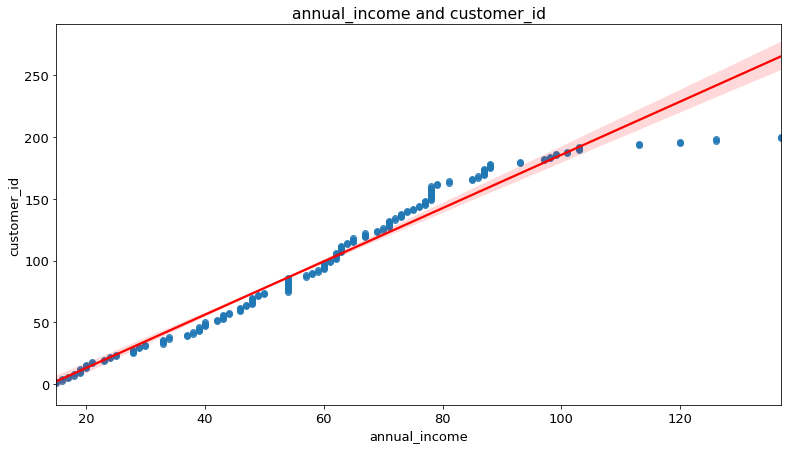

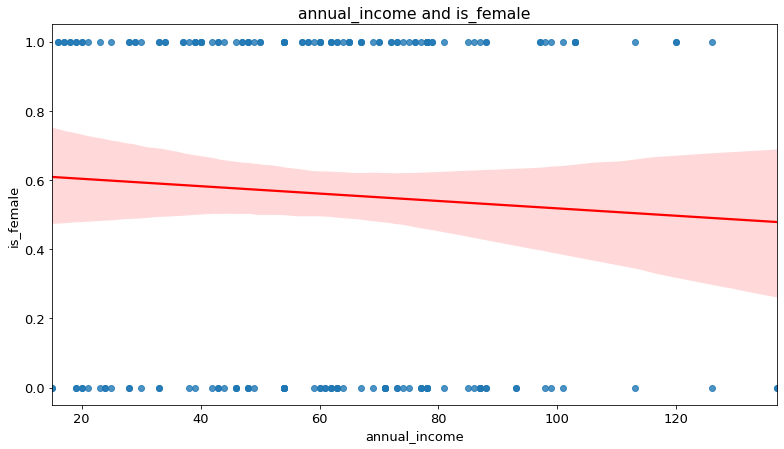

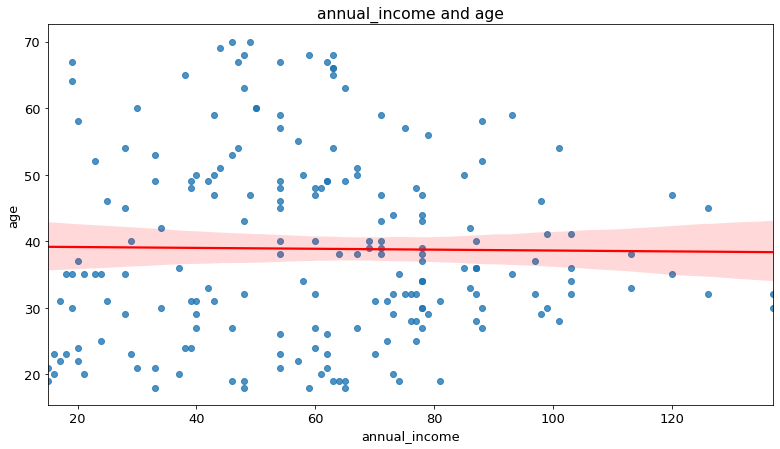

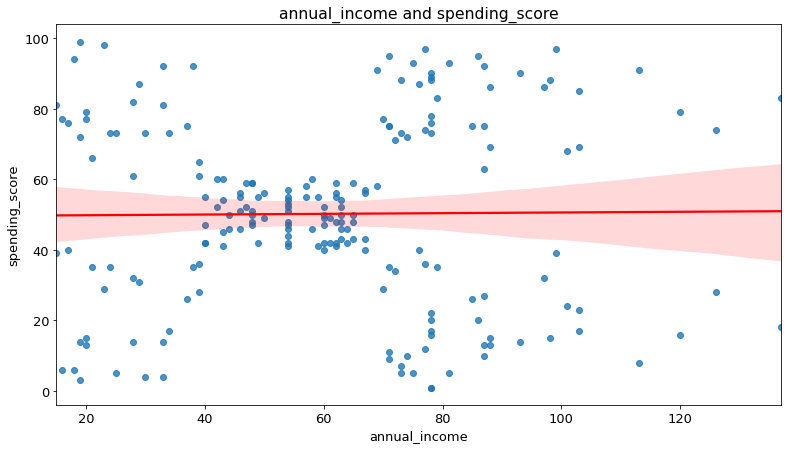

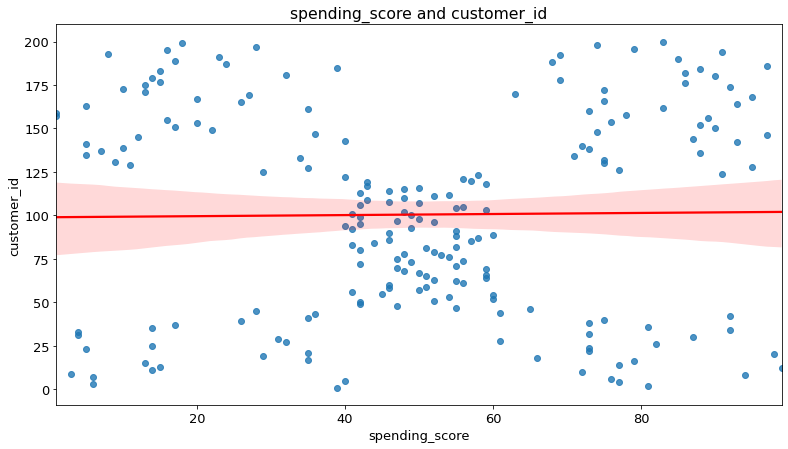

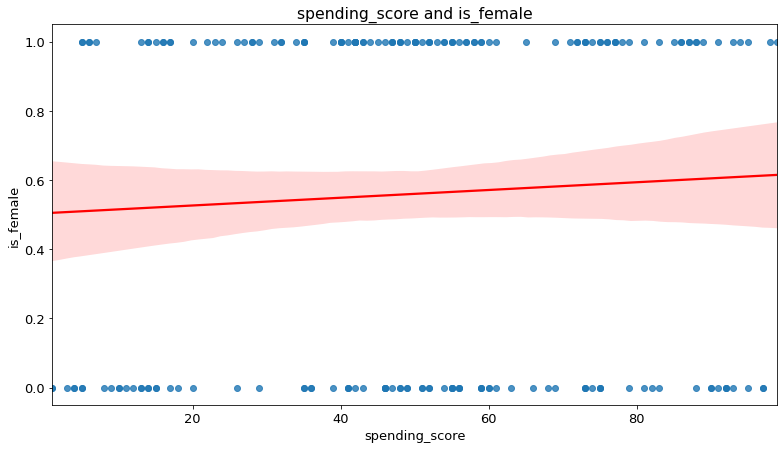

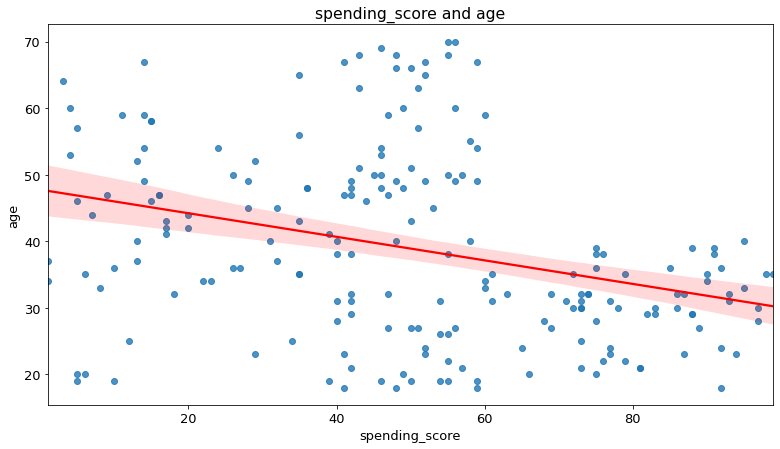

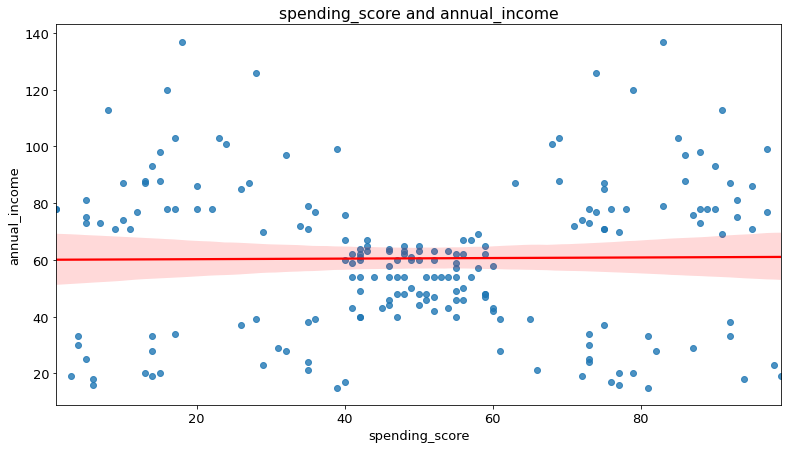

In [46]:
plot_variable_pairs(df)